In [1]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

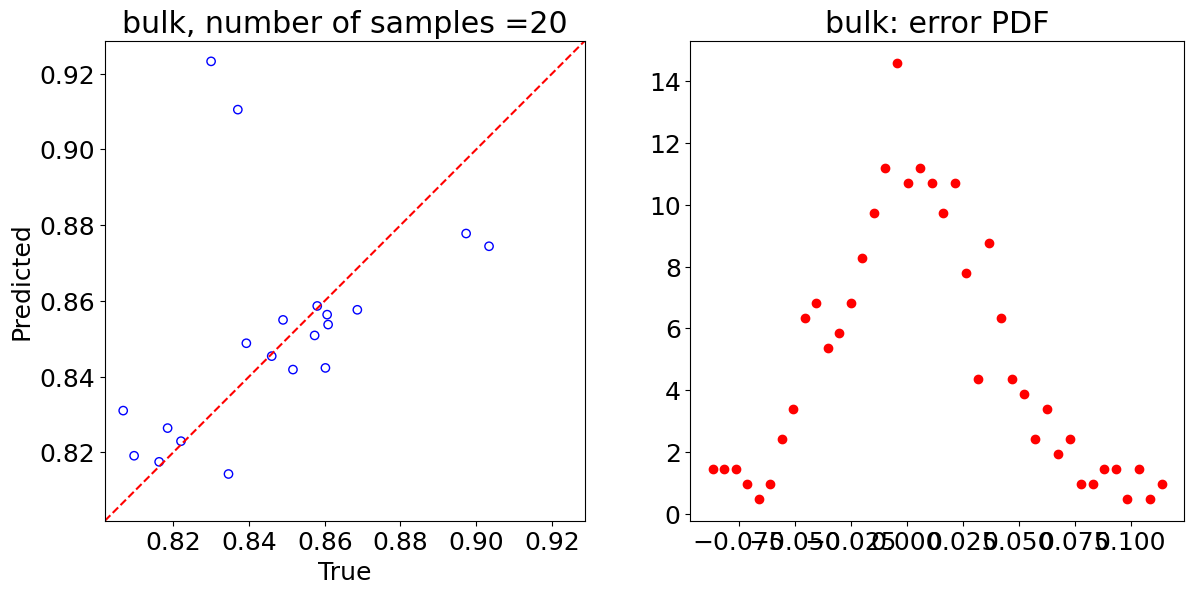

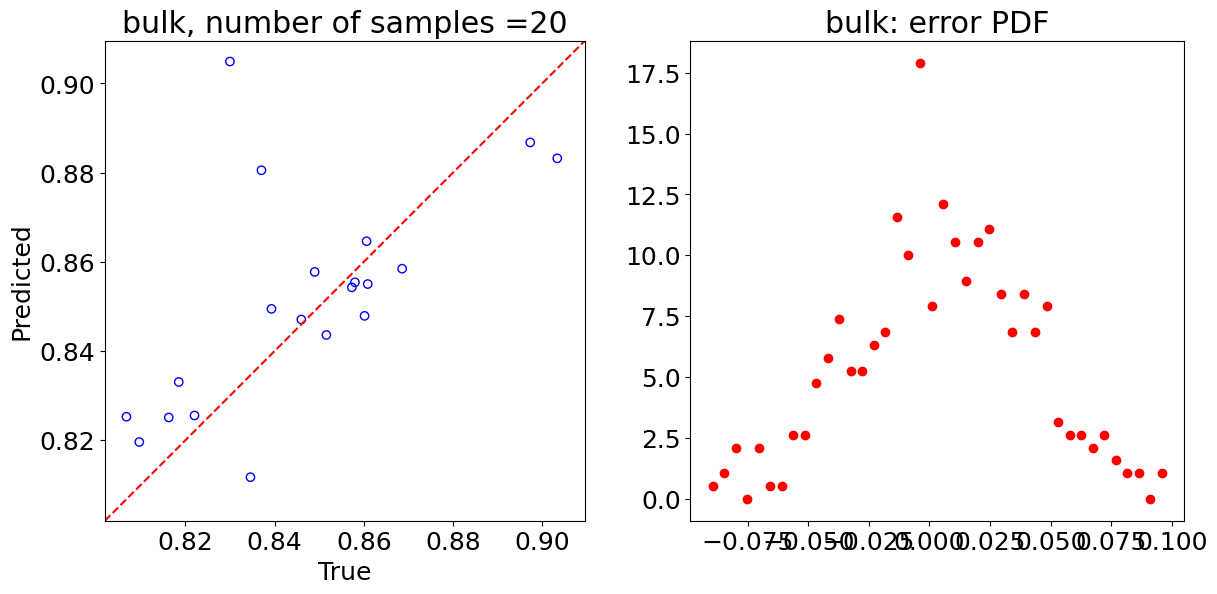

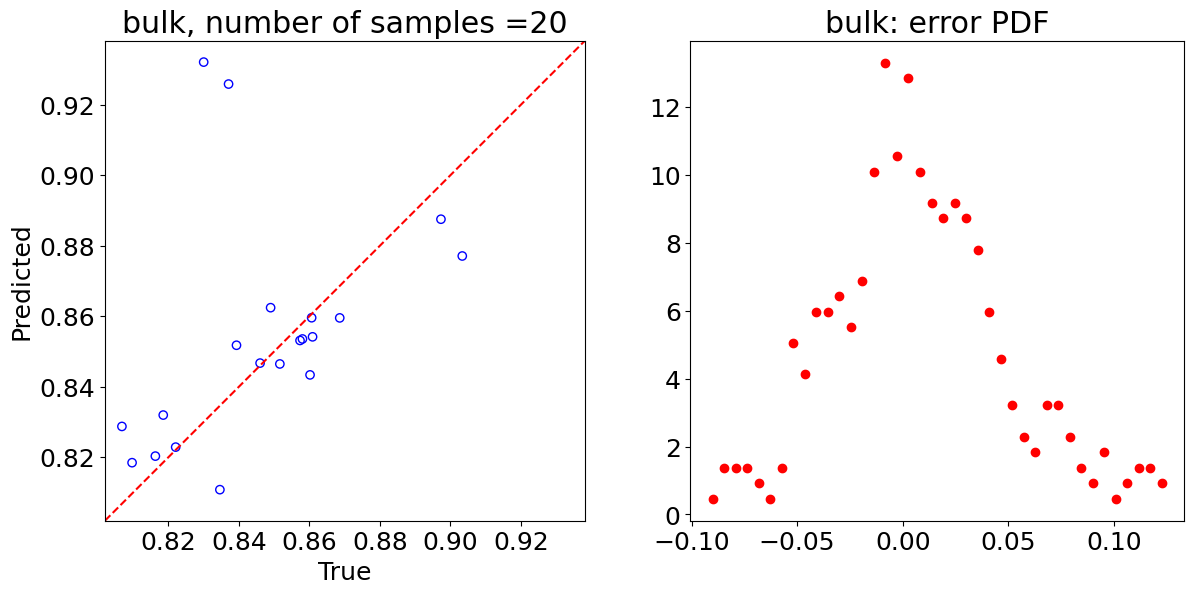

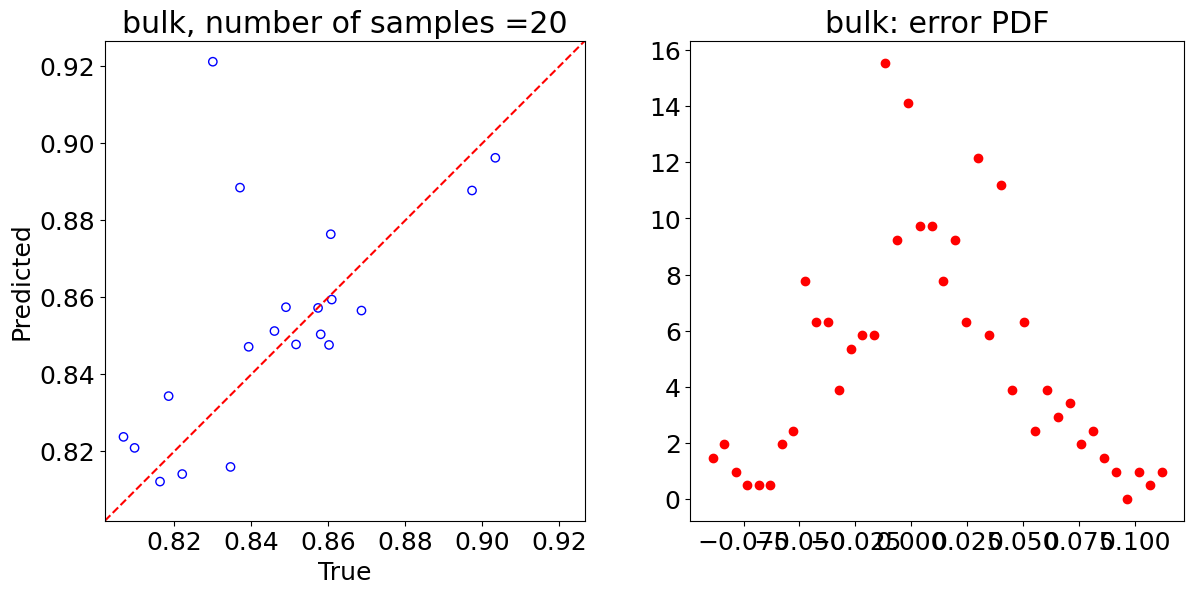

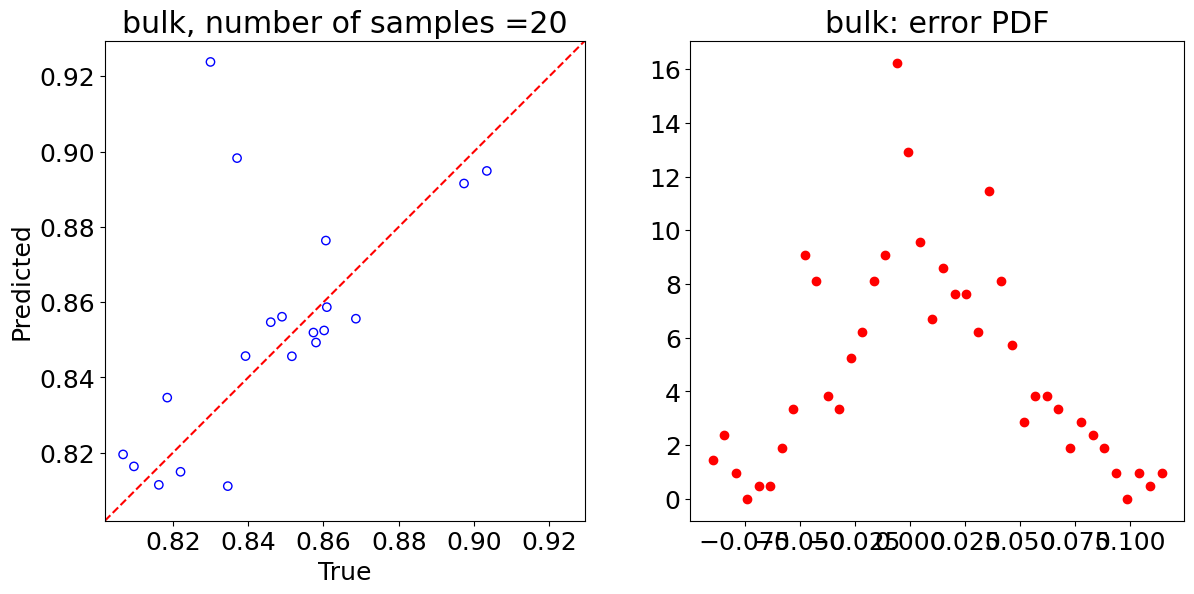

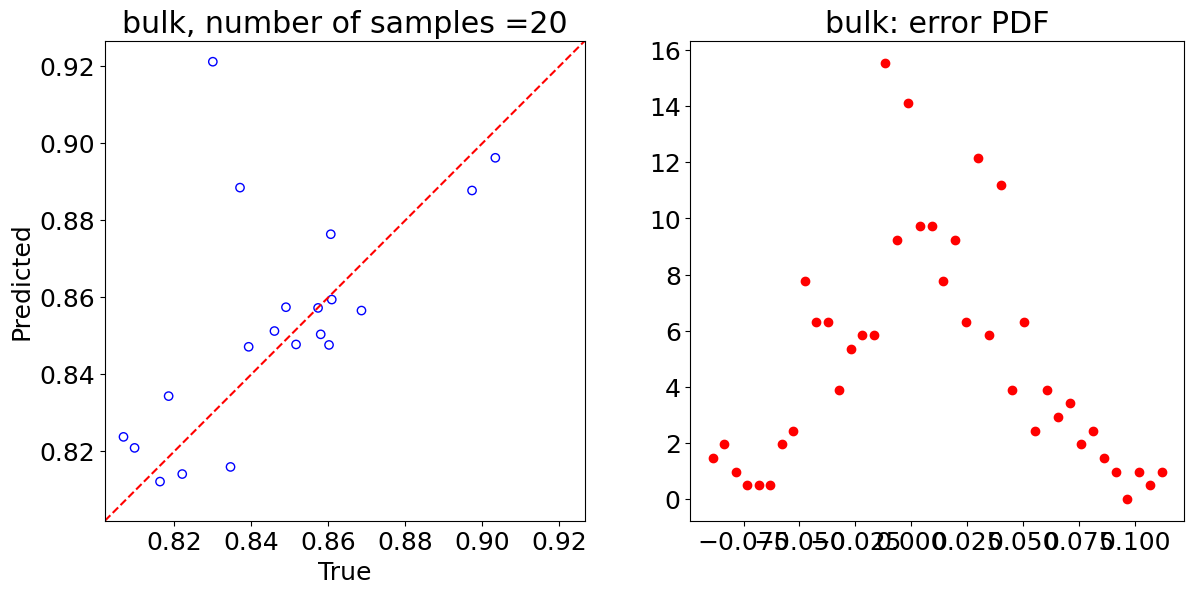

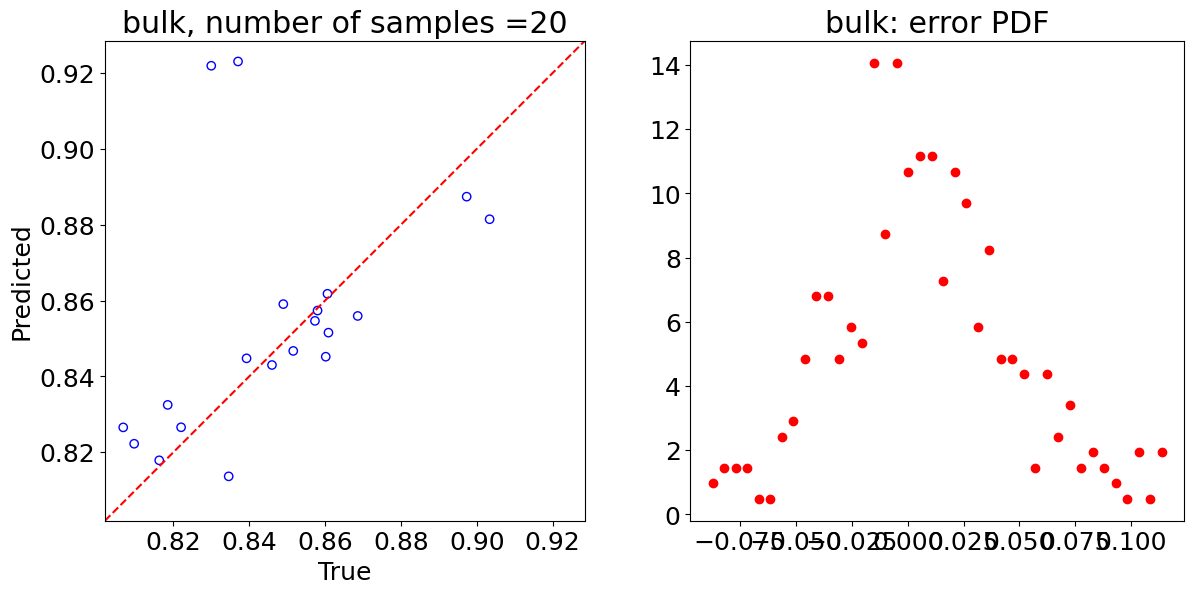

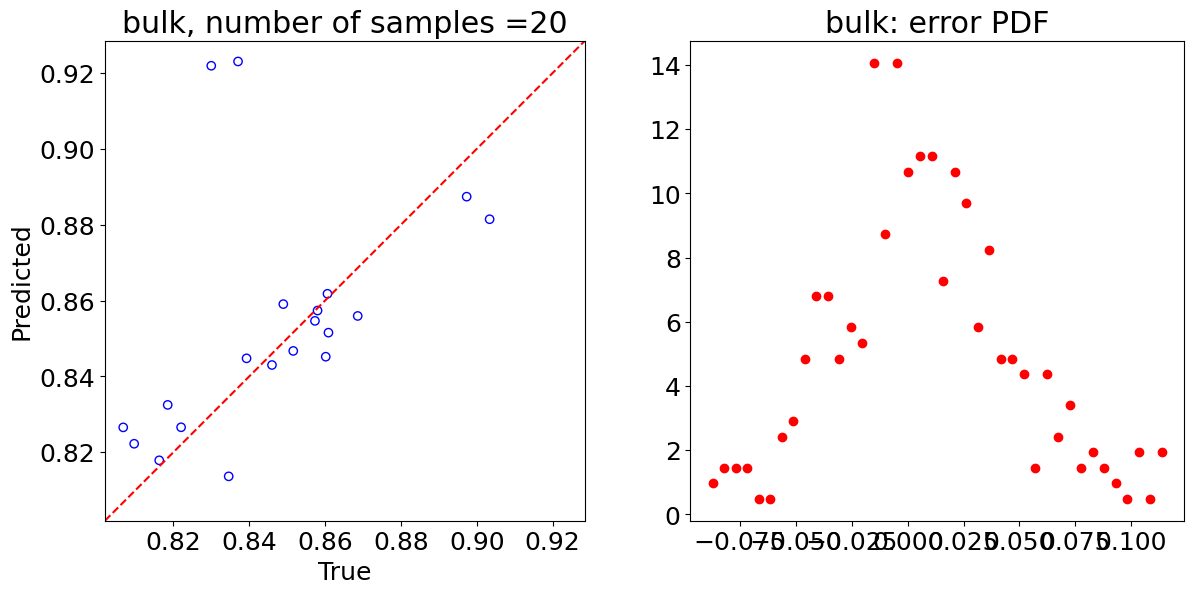

In [62]:
def load_pkl(file_path):
    with open(file_path, "rb") as f:
        fig = pickle.load(f)

    ax = fig.axes[0]

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    scatter_data = [collection.get_offsets() for collection in ax.collections]
    data = [np.array(data) for data in scatter_data]
    line_data = [line.get_data() for line in ax.lines]
    handles, labels = ax.get_legend_handles_labels()

    return {
    'scatter_data': scatter_data,
    'data': data,
    'line_data': line_data,
    'handles': handles,
    'labels': labels,
    'x_min': x_min,
    'x_max': x_max,
    'y_min': y_min,
    'y_max': y_max
}

run2 = load_pkl("pna/logs/gpu/gpu_run5/bulk.pkl")
run3 = load_pkl("pna/logs/gpu/gpu_run6/bulk.pkl")

run1 = load_pkl("pna/logs/gpu/gpu_run1/bulk.pkl")

run1_cpu = load_pkl("pna/logs/cpu/run_1/bulk.pkl")
run2_cpu = load_pkl("pna/logs/cpu/run_2/bulk.pkl")
run2d_cpu = load_pkl("pna/logs/cpu/run_2_deterministic/bulk.pkl")

run3_cpu = load_pkl("pna/logs/cpu/run_3_pt2.2/bulk.pkl")
run4_cpu = load_pkl("pna/logs/cpu/run_4_pt2.2_deterministic/bulk.pkl")


(0.8019532203674317, 0.9381849467754364)

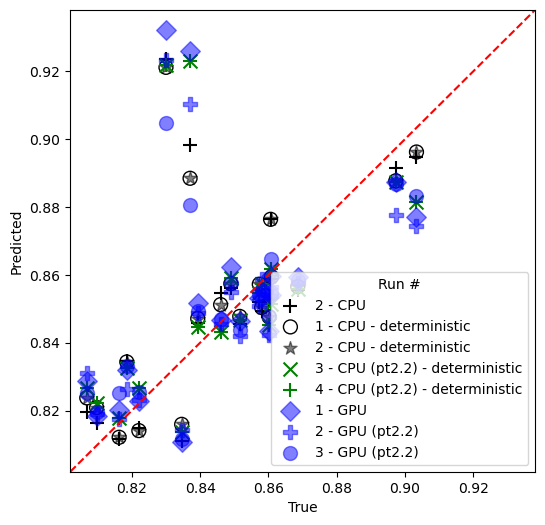

In [65]:
fig, ax = plt.subplots(figsize=(6, 6))




ax.scatter(run2_cpu['data'][0][:, 0], run2_cpu['data'][0][:, 1], 
           facecolors="k", label="2 - CPU", marker="+",s=100)
ax.scatter(run1_cpu['data'][0][:, 0], run1_cpu['data'][0][:, 1], 
           edgecolors="k", label="1 - CPU - deterministic", marker="o", facecolors='none',s=100)
ax.scatter(run2d_cpu['data'][0][:, 0], run2d_cpu['data'][0][:, 1], 
           facecolors="k", label="2 - CPU - deterministic", marker="*",s=100,alpha=0.5)


ax.scatter(run3_cpu['data'][0][:, 0], run3_cpu['data'][0][:, 1], 
           facecolors="g", label="3 - CPU (pt2.2) - deterministic", marker="x",s=100)
ax.scatter(run4_cpu['data'][0][:, 0], run4_cpu['data'][0][:, 1], 
           facecolors="g", label="4 - CPU (pt2.2) - deterministic", marker="+",s=100)


ax.scatter(run1['data'][0][:, 0], run1['data'][0][:, 1], 
           facecolors="b", label="1 - GPU ", marker="D",s=100,alpha=0.5)

ax.scatter(run2['data'][0][:, 0], run2['data'][0][:, 1], 
           facecolors="b", label="2 - GPU (pt2.2)", marker="P",s=100,alpha=0.5)
ax.scatter(run3['data'][0][:, 0], run3['data'][0][:, 1], 
           facecolors="b", label="3 - GPU (pt2.2)", marker="o",s=100,alpha=0.5)
ax.plot(run1['line_data'][0][0], run1['line_data'][0][1], 
        c="red",linestyle="--")

#plt.plot(x, y_fit, color='k')

ax.legend(title="Run #",loc="lower right")

ax.set_xlabel("True")
ax.set_ylabel("Predicted")

ax.set_xlim([run1['x_min'], run1['x_max']])
ax.set_ylim([run1['x_min'], run1['x_max']])